## Border and Obstacles

In [1]:
from optiwindnet.api import WindFarmNetwork
import numpy as np
import matplotlib.pyplot as plt

### Create a sample network

In [2]:
# all coordinates are sequences of (x, y) pairs
# if input coordinates are in arrays X and Y, use `np.hstack((X, Y))`
borderC = np.array( # coordinate sequence defines the polygon, last-first segment implicit
    [[1951, 200], [1951, 1383], [386, 1383], [650, 708], [624, 678],
     [4, 1036], [4, 3], [1152, 3], [917, 819], [957, 854]],
    dtype=float)

obstaclesC = [
    # - obstacles must be strictly inside the border polygon
    # - undefined behavior if obstacles and border overlap
    # first obstacle
    np.array([[1540, 920], [1600, 940], [1600, 1150], [1400, 1200]]),
    # [second obstacle] ...
]

substationsC = np.array([[696, 1063],], dtype=float)
turbinesC = np.array(
    [[1940, 279], [1920, 703], [1475, 696], [1839, 1250],
     [1277, 1296], [442, 1359], [737, 435], [1060, 26],
     [522, 176], [87, 35], [184, 417], [71, 878]],
    dtype=float
)

Initialize wfn with the given borders and obstacles

<Axes: >

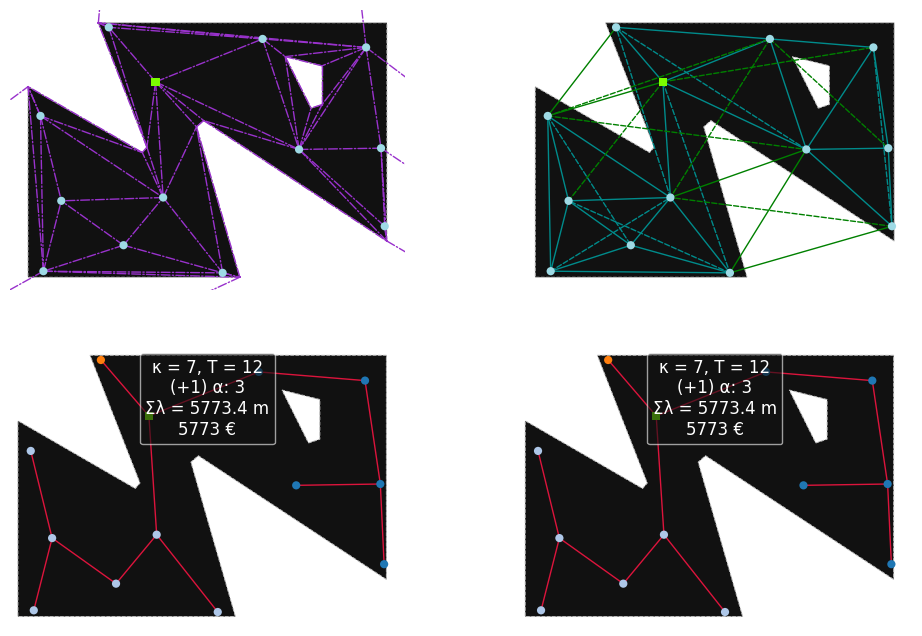

In [3]:
wfn_border_obstacles = WindFarmNetwork(turbinesC=turbinesC, substationsC=substationsC, cables=7, borderC=borderC, obstaclesC=obstaclesC, buffer_dist=1)
res_optimize = wfn_border_obstacles.optimize()
fig, axs = plt.subplots(2, 2, facecolor='none', figsize=(12, 8))
ax1, ax2, ax3, ax4 = axs.flatten()
wfn_border_obstacles.plot_navigation_mesh(ax=ax1)
wfn_border_obstacles.plot_available_links(ax=ax2)
wfn_border_obstacles.plot_selected_links(ax=ax3)
wfn_border_obstacles.plot(ax=ax4)

Only borders


<Axes: >

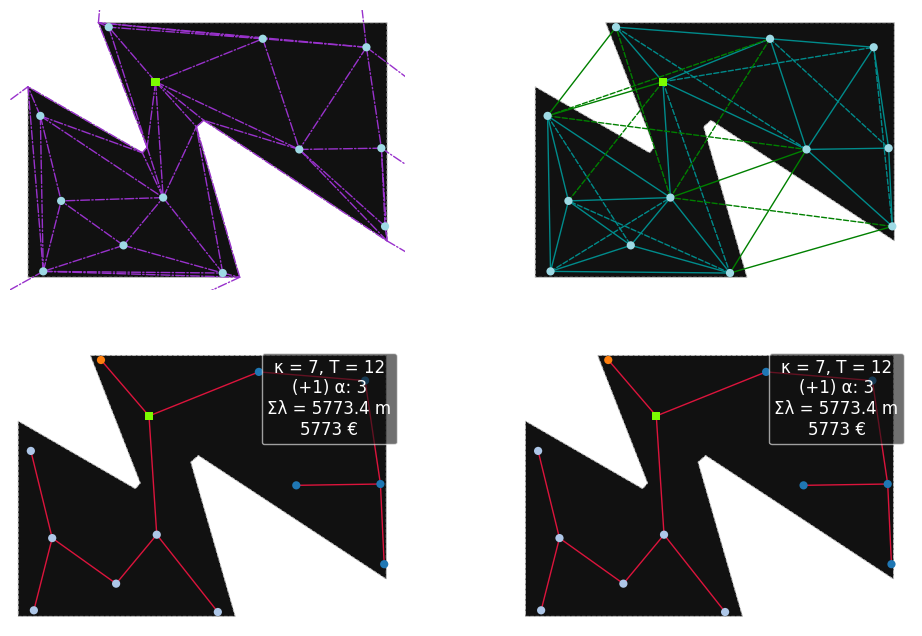

In [4]:
wfn_border = WindFarmNetwork(turbinesC=turbinesC, substationsC=substationsC, cables=7, borderC=borderC)
res_optimize = wfn_border.optimize()
fig, axs = plt.subplots(2, 2, facecolor='none', figsize=(12, 8))
ax1, ax2, ax3, ax4 = axs.flatten()
wfn_border.plot_navigation_mesh(ax=ax1)
wfn_border.plot_available_links(ax=ax2)
wfn_border.plot_selected_links(ax=ax3)
wfn_border.plot(ax=ax4)

Only obstacles

<Axes: >

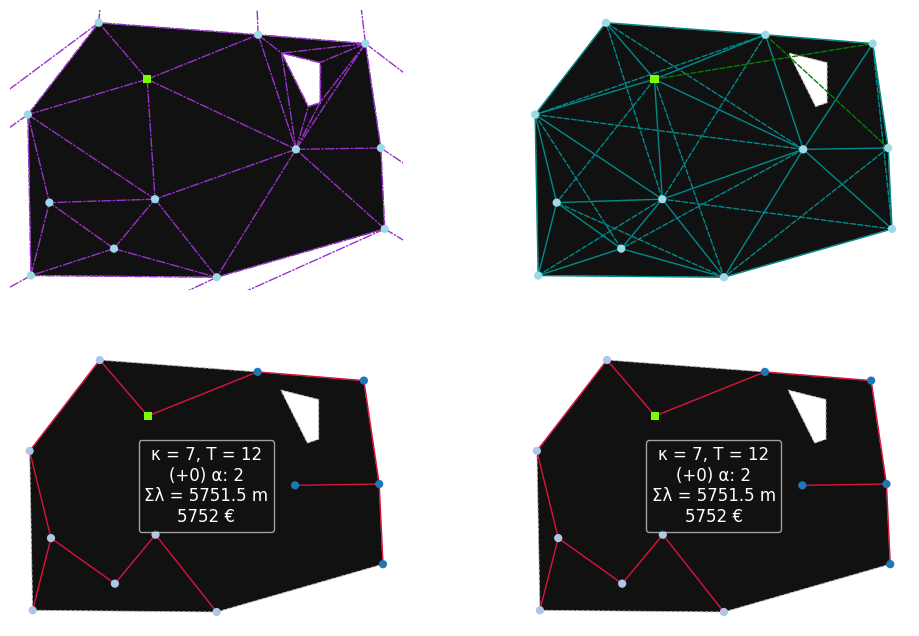

In [5]:
wfn_obstacles = WindFarmNetwork(turbinesC=turbinesC, substationsC=substationsC, cables=7, obstaclesC=obstaclesC)
res_optimize = wfn_obstacles.optimize()
fig, axs = plt.subplots(2, 2, facecolor='none', figsize=(12, 8))
ax1, ax2, ax3, ax4 = axs.flatten()
wfn_obstacles.plot_navigation_mesh(ax=ax1)
wfn_obstacles.plot_available_links(ax=ax2)
wfn_obstacles.plot_selected_links(ax=ax3)
wfn_obstacles.plot(ax=ax4)

No borders, no obstacles

<Axes: >

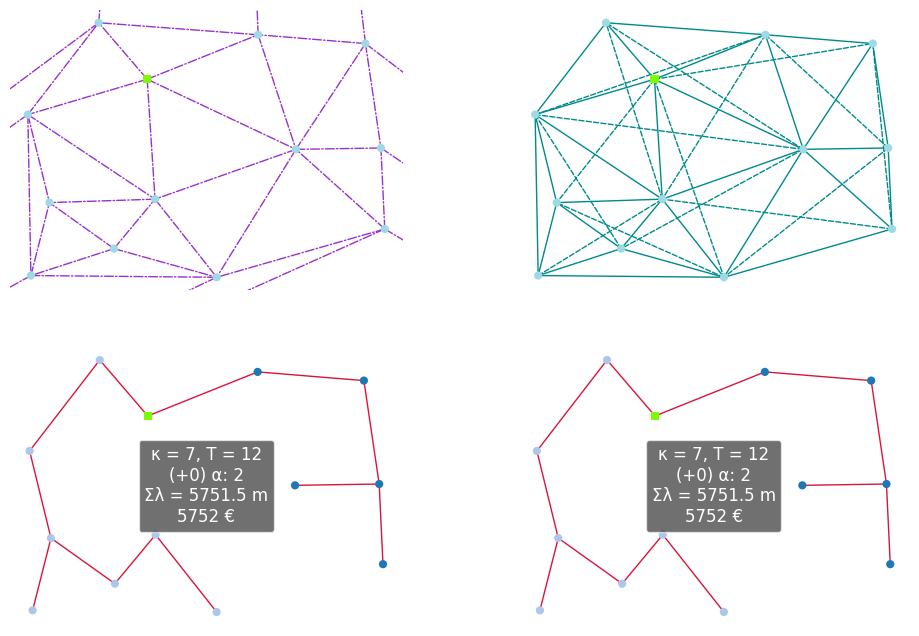

In [6]:
wfn = WindFarmNetwork(turbinesC=turbinesC, substationsC=substationsC, cables=7)
res_optimize = wfn.optimize()
fig, axs = plt.subplots(2, 2, facecolor='none', figsize=(12, 8))
ax1, ax2, ax3, ax4 = axs.flatten()
wfn.plot_navigation_mesh(ax=ax1)
wfn.plot_available_links(ax=ax2)
wfn.plot_selected_links(ax=ax3)
wfn.plot(ax=ax4)

New obstacles

In [7]:
obstacles = [
    np.array([[1540, 920], [1600, 940], [1600, 1150], [900, 1900]]),
    np.array([[-100, 100], [400, 100], [400, 400], [100, 400]]),
]

<Axes: >

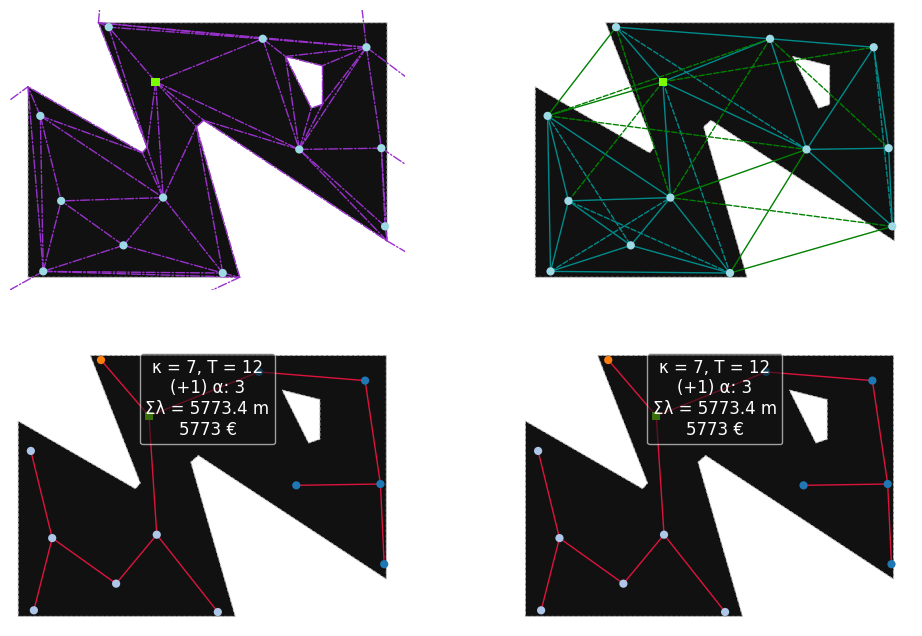

In [8]:
# border + obstacles
wfn_new_border_obstacles = WindFarmNetwork(turbinesC=turbinesC, substationsC=substationsC, cables=7, borderC=borderC, obstaclesC=obstaclesC)
res_optimize = wfn_new_border_obstacles.optimize()
fig, axs = plt.subplots(2, 2, facecolor='none', figsize=(12, 8))
ax1, ax2, ax3, ax4 = axs.flatten()
wfn_new_border_obstacles.plot_navigation_mesh(ax=ax1)
wfn_new_border_obstacles.plot_available_links(ax=ax2)
wfn_new_border_obstacles.plot_selected_links(ax=ax3)
wfn_new_border_obstacles.plot(ax=ax4)

<Axes: >

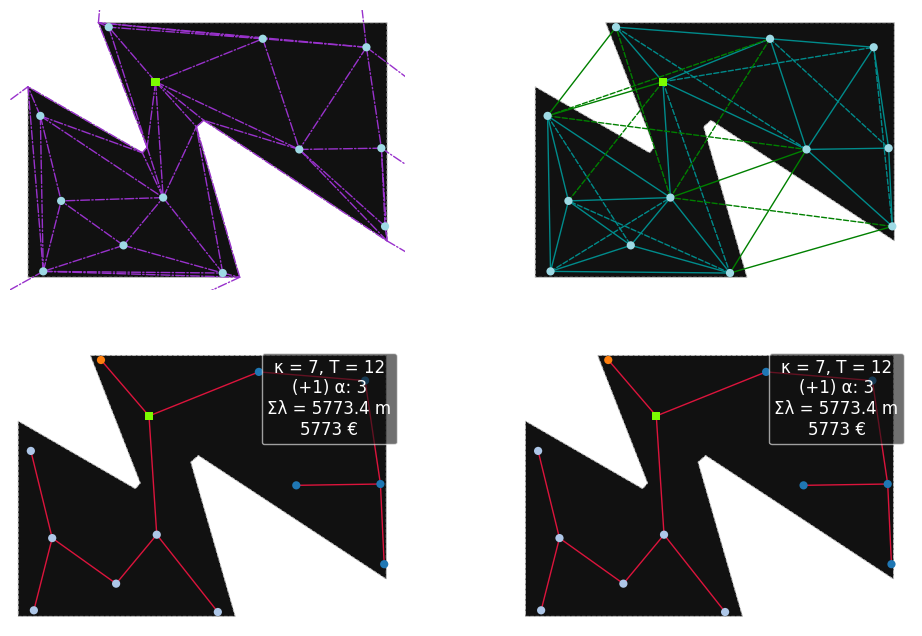

In [9]:
# only borders
wfn_new_border = WindFarmNetwork(turbinesC=turbinesC, substationsC=substationsC, cables=7, borderC=borderC)
res_optimize = wfn_new_border.optimize()
fig, axs = plt.subplots(2, 2, facecolor='none', figsize=(12, 8))
ax1, ax2, ax3, ax4 = axs.flatten()
wfn_new_border.plot_navigation_mesh(ax=ax1)
wfn_new_border.plot_available_links(ax=ax2)
wfn_new_border.plot_selected_links(ax=ax3)
wfn_new_border.plot(ax=ax4)

<Axes: >

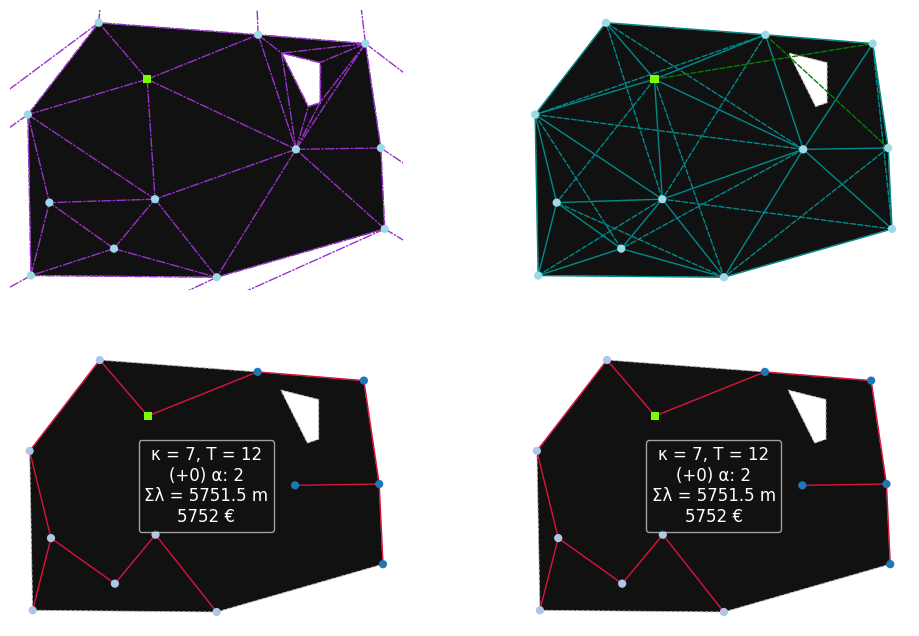

In [10]:
# only obstacles
wfn_new_obstacles = WindFarmNetwork(turbinesC=turbinesC, substationsC=substationsC, cables=7, obstaclesC=obstaclesC)
res_optimize = wfn_new_obstacles.optimize()
fig, axs = plt.subplots(2, 2, facecolor='none', figsize=(12, 8))
ax1, ax2, ax3, ax4 = axs.flatten()
wfn_new_obstacles.plot_navigation_mesh(ax=ax1)
wfn_new_obstacles.plot_available_links(ax=ax2)
wfn_new_obstacles.plot_selected_links(ax=ax3)
wfn_new_obstacles.plot(ax=ax4)

<Axes: >

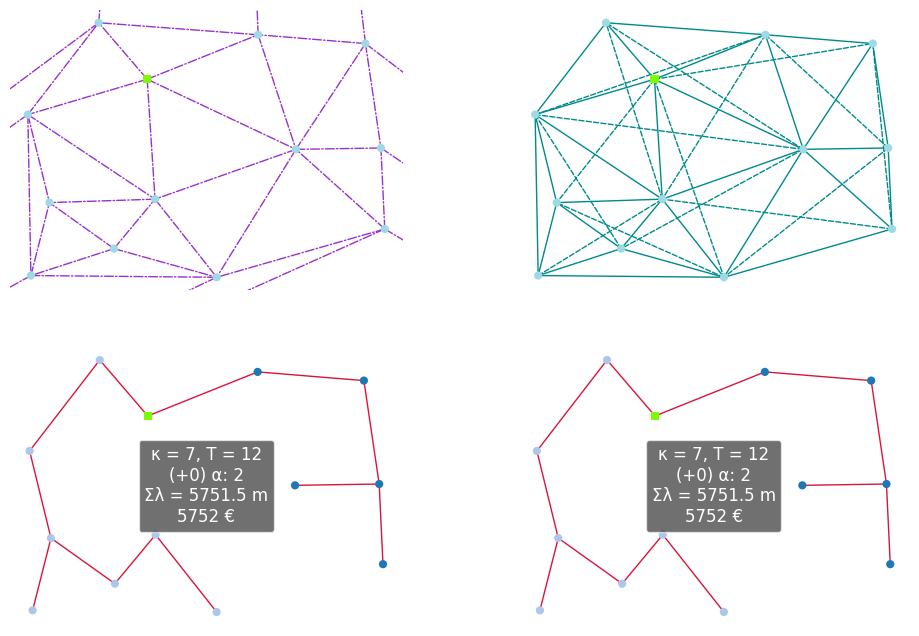

In [11]:
# No border, no obstacles
wfn_new = WindFarmNetwork(turbinesC=turbinesC, substationsC=substationsC, cables=7)
res_optimize = wfn_new.optimize()
fig, axs = plt.subplots(2, 2, facecolor='none', figsize=(12, 8))
ax1, ax2, ax3, ax4 = axs.flatten()
wfn_new.plot_navigation_mesh(ax=ax1)
wfn_new.plot_available_links(ax=ax2)
wfn_new.plot_selected_links(ax=ax3)
wfn_new.plot(ax=ax4)

In [12]:
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

def expand_polygon_safely(polygon, buffer_dist):
    """Expand a polygon and warn if buffer might fill narrow gaps."""
    min_gap = polygon.exterior.minimum_clearance

    if buffer_dist >= min_gap / 2:
        print(f"⚠️ Warning: Expanding by {buffer_dist} may fill narrow gaps (min gap ≈ {min_gap:.2f}).")
    else:
        print(f"✅ Expanding by {buffer_dist} is safe (min gap ≈ {min_gap:.2f}).")
    
    expanded_polygon = polygon.buffer(buffer_dist)

    return expanded_polygon

def shrink_polygon_safely(polygon, shrink_dist):
    """Shrink a polygon and warn if it splits or disappears."""
    shrunk_polygon = polygon.buffer(-shrink_dist)

    if shrunk_polygon.is_empty:
        print(f"⚠️ Warning: Shrinking by {shrink_dist} completely removed the polygon!")
    elif shrunk_polygon.geom_type == 'MultiPolygon':
        print(f"⚠️ Warning: Shrinking by {shrink_dist} split the polygon into {len(shrunk_polygon.geoms)} pieces.")
    else:
        print(f"✅ Shrinking by {shrink_dist} kept the polygon as one piece.")

    return shrunk_polygon


Buffering by 21.00 may introduce unexpexted changes in the exterior border (min gap ≈ 39.70). 
 For visual comparison use plot_original_vs_buffered method.


<Axes: >

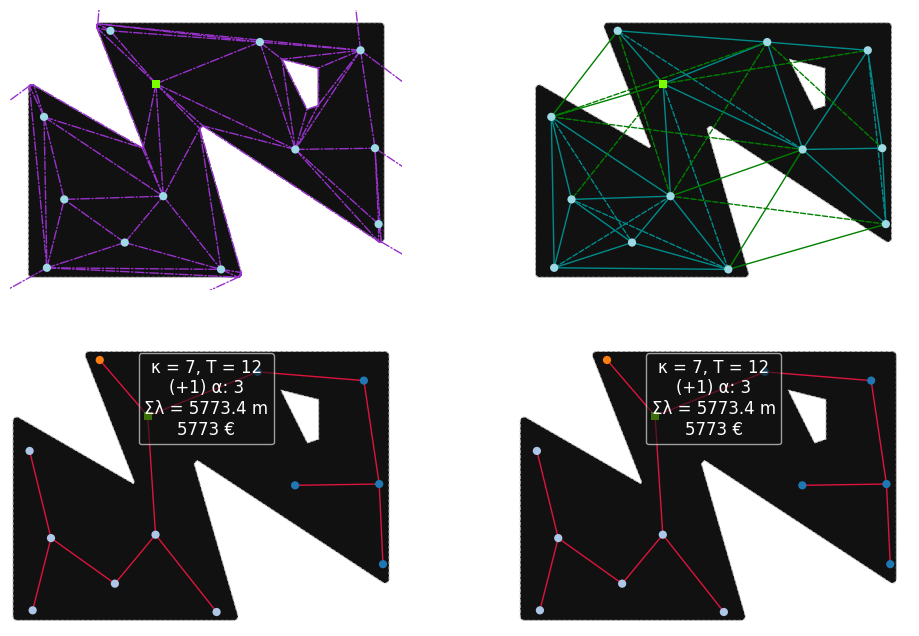

In [13]:
# all coordinates are sequences of (x, y) pairs
# if input coordinates are in arrays X and Y, use `np.hstack((X, Y))`
borderC = np.array( # coordinate sequence defines the polygon, last-first segment implicit
    [[1951, 200], [1951, 1383], [386, 1383], [650, 708], [624, 678],
     [4, 1036], [4, 3], [1152, 3], [917, 819], [957, 854]],
    dtype=float)

obstaclesC = [
    # - obstacles must be strictly inside the border polygon
    # - undefined behavior if obstacles and border overlap
    # first obstacle
    np.array([[1540, 920], [1600, 940], [1600, 1150], [1400, 1200]]),
    # [second obstacle] ...
]

substationsC = np.array([[696, 1063],], dtype=float)
turbinesC = np.array(
    [[1940, 279], [1920, 703], [1475, 696], [1839, 1250],
     [1277, 1296], [442, 1359], [737, 435], [1060, 26],
     [522, 176], [87, 35], [184, 417], [71, 878]],
    dtype=float
)

buffer_dist=21
wfn_border_obstacles = WindFarmNetwork(turbinesC=turbinesC, substationsC=substationsC, cables=7, borderC=borderC, obstaclesC=obstaclesC, buffer_dist=buffer_dist)
res_optimize = wfn_border_obstacles.optimize()
fig, axs = plt.subplots(2, 2, facecolor='none', figsize=(12, 8))
ax1, ax2, ax3, ax4 = axs.flatten()
wfn_border_obstacles.plot_navigation_mesh(ax=ax1)
wfn_border_obstacles.plot_available_links(ax=ax2)
wfn_border_obstacles.plot_selected_links(ax=ax3)
wfn_border_obstacles.plot(ax=ax4)

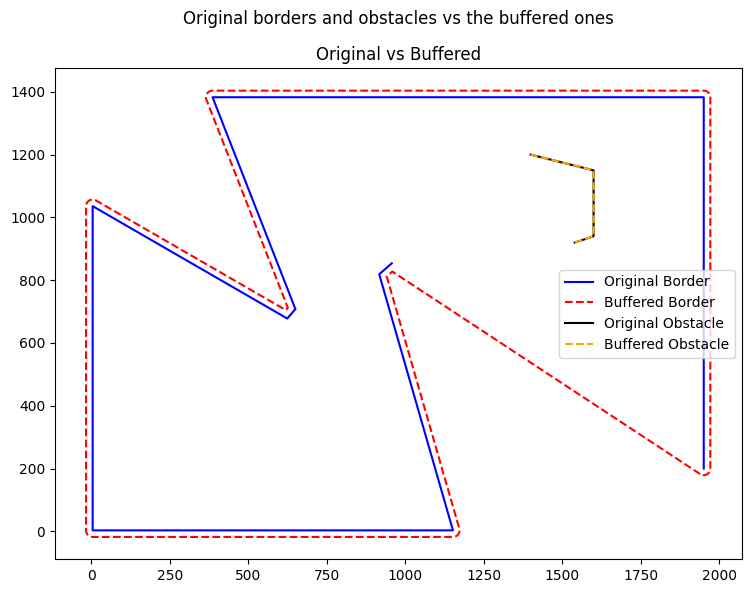

In [14]:
wfn_border_obstacles.plot_original_vs_buffered()

NameError: name 'title' is not defined

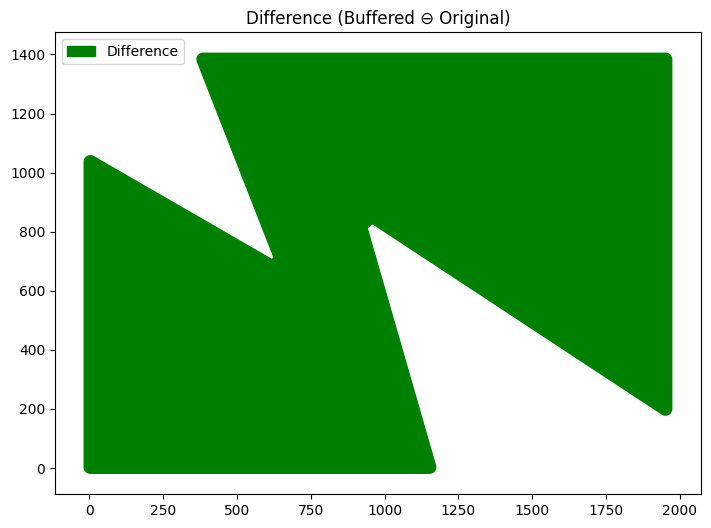

In [15]:
wfn_border_obstacles.plot_buffer_difference()